# Source Code

Import Required:

In [3]:
import numpy as np

In [4]:
import nltk

In [5]:
import matplotlib.pyplot as plt

In [6]:
from collections import Counter

Download the necessary files for the Natural Language Toolkit

*For this project, I downloaded the most popular*

In [ ]:
nltk.download()

Create a list where each line is split by the quotes and separated by commas. Then, each line is separated by line number, character name, and dialogue.

Each word in the list becomes lowercased. This is the structured data that is used throughout this project.

*For length purposes, the print statement is commented out. Refer to SW_Dataset.ipynb to view the entire printed out structured dataset.*

In [7]:
#create a list: separated by each line: line number, character name, and dialogue
sw_dic = []
with open("C:/Users/supin/Desktop/starwars/SW_EpisodeV.txt", "r") as text:
    text = text.readlines()[1:]  #skip first line in file
    for line in text:
        line = line.lower().split('"') #lowercase all words and split by quotes
        dialogue = line.pop(5)
        name = line.pop(3)
        line_number = line.pop(1)
        new_obj = {
            "line": line_number,
            "name": name,
            "dialogue": dialogue
        }
        sw_dic.append(new_obj)
# print(sw_dic)

Create a numpy.ndarray of all the character names. Create a list to store all these names. Then using Counter, find the number of lines each character has and store in a dictionary.

In [8]:
#create a numpy.ndarray of all character names
arr = np.array(sw_dic)
#create a list of all names
name_column = [row['name'] for row in arr]
#turn the list into a dictionary of how many lines each character has
name_freq = dict(Counter(name_column))
print(name_freq)

{'luke': 128, 'han': 182, 'rieekan': 13, 'leia': 114, 'threepio': 92, 'deck officer': 7, 'assistant officer': 1, 'lieutenant': 2, 'derlin': 3, 'ben': 15, 'zev': 6, 'announcer': 3, 'senior controller': 2, 'piett': 23, 'ozzel': 5, 'vader': 56, 'rebel captain': 1, 'rebel fighter': 1, 'medical droid': 2, 'controller': 3, 'veers': 7, 'hobbie': 1, 'pilots': 1, 'captain': 1, 'woman controller': 1, 'dack': 4, 'trench officer': 3, 'wedge': 8, 'janson': 4, 'head controller': 1, 'officer': 1, 'second officer': 1, 'pilot': 1, 'imperial officer': 2, 'strange voice': 1, 'creature': 21, 'needa': 5, 'emperor': 5, 'yoda': 36, 'first controller': 1, 'second controller': 1, 'boba fett': 4, 'tracking officer': 2, 'communications officer': 2, 'intercom voice': 2, 'lando': 61, 'second threepio': 1, 'man': 1, 'imperial soldier': 1}


Define a function to find the character that speaks the most frequently throughout this episode. This character has the most lines and is the most active.

In [9]:
#function to find the character that speaks the most frequent
def most_frequent(name_column):
    counter = 0
    num = name_column[0]
    for i in name_column:
        freq = name_column.count(i)
        if(freq>counter):
            counter = freq
            num = i
    return num
#print the character with the most lines
print("The most active character in this episode is: ",most_frequent(name_column))

The most active character in this episode is:  han


Using the dictionary of all character names and line frequency, retrieve the keys and values.

In [11]:
#only the dictionary keys (character names)
char_name_dic = name_freq.keys()
print(char_name_dic)

dict_keys(['luke', 'han', 'rieekan', 'leia', 'threepio', 'deck officer', 'assistant officer', 'lieutenant', 'derlin', 'ben', 'zev', 'announcer', 'senior controller', 'piett', 'ozzel', 'vader', 'rebel captain', 'rebel fighter', 'medical droid', 'controller', 'veers', 'hobbie', 'pilots', 'captain', 'woman controller', 'dack', 'trench officer', 'wedge', 'janson', 'head controller', 'officer', 'second officer', 'pilot', 'imperial officer', 'strange voice', 'creature', 'needa', 'emperor', 'yoda', 'first controller', 'second controller', 'boba fett', 'tracking officer', 'communications officer', 'intercom voice', 'lando', 'second threepio', 'man', 'imperial soldier'])


In [13]:
#only the dictionary values (how many lines each character has)
freq_dic = name_freq.values()
print(freq_dic)

dict_values([128, 182, 13, 114, 92, 7, 1, 2, 3, 15, 6, 3, 2, 23, 5, 56, 1, 1, 2, 3, 7, 1, 1, 1, 1, 4, 3, 8, 4, 1, 1, 1, 1, 2, 1, 21, 5, 5, 36, 1, 1, 4, 2, 2, 2, 61, 1, 1, 1])


Using the keys and values, create a bar chart comparing the characters and their line frequency.

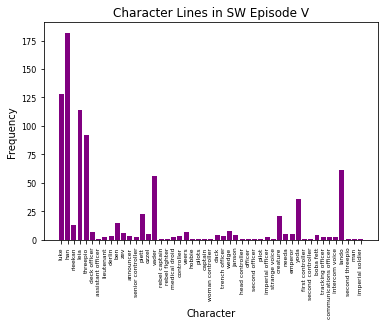

In [14]:
#create a bar chart comparing characters and the number of lines they have
Character = char_name_dic 
Frequency = freq_dic 
plt.bar(Character, Frequency, color=['purple'])
plt.title('Character Lines in SW Episode V')
plt.xlabel('Character', labelpad= -10)
plt.xticks(rotation = 'vertical')
plt.xticks(fontsize= 6)
plt.ylabel('Frequency')
plt.yticks(fontsize = 8)
plt.show()

-----

Create a numpy.ndarray of all the dialogue spoken throughout the episode. Create a list to store all the dialogue.

*For length purposes, the print statement is commented out*

In [16]:
#create a numpy.ndarray of the dialogue
dialogue_arr = np.array(sw_dic)
#turn it into a list of the dialogue
char_lines = [row['dialogue'] for row in dialogue_arr]
#print(char_lines)

To use the dialogue, it is important to remove all punctuation. First, remove all outer punctuation.

*For length purposes, the print statement is commented out*

In [17]:
#remove punctuation
import string
excluded = set(string.punctuation)
char_lines = ' '.join(ch for ch in char_lines if ch not in excluded)
# print(char_lines)

After removing the outer punctuation, the inner punctuation must also be removed.

In [18]:
#remove the rest of the punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
no_punc_lines = " "
for char_punc in char_lines:
    if char_punc not in punc:
        no_punc_lines = no_punc_lines + char_punc
no_punc_lines = no_punc_lines
# print(no_punc_lines)

Now, all stopwords must be removed from the dialogue. These stopwords are words that do not add much meaning to this analysis, and therefore are unnecessary.

Import required:

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

If needed, download stopwords from the Natural Language Toolkit.

In [21]:
nltk.download('stopwords')

Remove all stopwords from the dialogue, storing it in a list.


*For length purposes, the print statement is commented out*

In [25]:
#remove stopwords from the dialogue
stopWords = set(stopwords.words('english'))
words = word_tokenize(no_punc_lines)
filtered_dialogue = []

for w in words:
    if w not in stopWords:
        filtered_dialogue.append(w)
#print(filtered_dialogue)

Using Counter, find the 20 most common words used throughout the episode.

In [26]:
#create a list of the 20 most common words used throughout the episode
Count_no = Counter(filtered_dialogue)
common_words = Count_no.most_common(20)
print(common_words)

[('dont', 66), ('im', 61), ('oh', 42), ('well', 41), ('yes', 40), ('right', 38), ('sir', 38), ('know', 36), ('going', 35), ('get', 33), ('good', 31), ('see', 29), ('go', 28), ('lord', 28), ('come', 27), ('artoo', 27), ('chewie', 26), ('youre', 25), ('luke', 25), ('like', 25)]


Convert this list into a dictionary.

In [27]:
#Turn the list into a dictionary of the 20 most common words
common_words_dic = dict(common_words)
print(common_words_dic)

{'dont': 66, 'im': 61, 'oh': 42, 'well': 41, 'yes': 40, 'right': 38, 'sir': 38, 'know': 36, 'going': 35, 'get': 33, 'good': 31, 'see': 29, 'go': 28, 'lord': 28, 'come': 27, 'artoo': 27, 'chewie': 26, 'youre': 25, 'luke': 25, 'like': 25}


Using the dictionary of the 20 most common words and their frequency, retrieve the keys and values.

In [28]:
#only the dictionary keys (words)
most_freq_words_used = common_words_dic.keys()
print(most_freq_words_used)

dict_keys(['dont', 'im', 'oh', 'well', 'yes', 'right', 'sir', 'know', 'going', 'get', 'good', 'see', 'go', 'lord', 'come', 'artoo', 'chewie', 'youre', 'luke', 'like'])


In [29]:
#only the dictionary values (how often the word occurs)
most_freq_words_used_values = common_words_dic.values()
print(most_freq_words_used_values)

dict_values([66, 61, 42, 41, 40, 38, 38, 36, 35, 33, 31, 29, 28, 28, 27, 27, 26, 25, 25, 25])


Using the keys and values, create a bar chart comparing the 20 most common words spoken and their frequency.

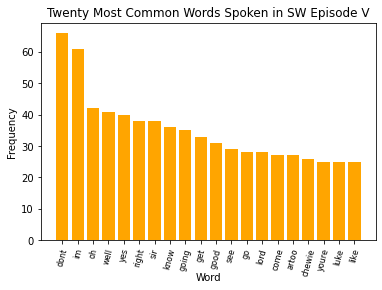

In [30]:
#create a bar chart comparing 20 most common words and how often they occur
Word = most_freq_words_used
Word_Frequency = most_freq_words_used_values
plt.bar(Word, Word_Frequency, color=['orange'])
plt.title('Twenty Most Common Words Spoken in SW Episode V')
plt.xlabel('Word', labelpad= -4)
plt.xticks(rotation = 75)
plt.xticks(fontsize= 8)
plt.ylabel('Frequency')
plt.yticks(fontsize = 10)
plt.show()